## 유전 알고리즘
*   TSP(Traveling Salesman Problem)






In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Good Examples: seed(0), nCity: 13
np.random.seed(5)
nCity = 7           # Number of cities
pNum = 20           # Population Size of each Generation

x = np.random.randint(5, 45, nCity)
y = np.random.randint(5, 45, nCity)

##### TSP 확인용 예시
x = [ 8, 10, 15, 20, 25, 30, 35, 40, 42, 40, 35, 30, 25, 20, 15, 10]
y = [25, 34, 40, 43, 45, 43, 40, 34, 25, 16, 10, 7,  5,  7,  10, 15]
nCity = len(x)

def crossover(p1, p2, ncity):   # 교배 함수 -> 두 부모의 중간 절단, 접합
    cut = ncity//2
    child1 = p1[:cut]    
    child2_tmp = p2[:]
    i = 0
    j = cut
    while(i < cut and  j < ncity-1):
        while(i < cut and p2[i] in child1):
            i += 1
        while(j < ncity-1 and p2[j] not in child1):
            j += 1
        if (i < cut and j < ncity-1):
            child2_tmp[j] = p2[i]
            i += 1
            j += 1
    child2 = child2_tmp[cut:]
    return child1+child2

def score_calc(dist, pop, ncity) :  # 개체별 경로 길이 계산 함수
    score = []
    for i in range(pNum):
        fsum = 0
        fsum += dist[0][pop[i][0]]
        for j in range(ncity-2):
            fsum += dist[pop[i][j]][pop[i][j+1]]
        j += 1
        fsum += dist[pop[i][j]][0]
        score.append(fsum.round(1))
    return score

def new_gen(pop, par_candi, ncity) :  # 새로운 세대의 개체 생성 함수
    new_pop = []
    for i in range(pNum):
        parent = np.random.choice(par_candi, 2, replace=False)
        child = crossover(pop[parent[0]], pop[parent[1]], ncity)
        
        if np.random.rand() < 0.2 :     # 돌연변이 발생 --> 임의의 자식 중 임의의 유전자 강제 교환
            mutate = np.random.choice(range(ncity-1), 2, replace=False)
            temp = child[mutate[0]]
            child[mutate[0]] = child[mutate[1]]
            child[mutate[1]] = temp
        new_pop.append(child)
    return new_pop
# 룰렛휠
def new_gen_for_roulette_wheel(pop, par_candi, ncity, p) :  # 새로운 세대의 개체 생성 함수
    new_pop = []
    for i in range(pNum):
        parent = np.random.choice(par_candi, 2, replace=False, p=p)
        child = crossover(pop[parent[0]], pop[parent[1]], ncity)
        
        if np.random.rand() < 0.2 :     # 돌연변이 발생 --> 임의의 자식 중 임의의 유전자 강제 교환
            mutate = np.random.choice(range(ncity-1), 2, replace=False)
            temp = child[mutate[0]]
            child[mutate[0]] = child[mutate[1]]
            child[mutate[1]] = temp
        new_pop.append(child)
    return new_pop
 

In [35]:
pos = list(zip(x,y))
dist = np.zeros((nCity, nCity))
for i in range(nCity) :     # 모든 두지점 사이의 직선거리 계산
    for j in range(nCity) :
        if i == j :
            continue
        dist[i,j] = np.sqrt(np.square(pos[i][0]-pos[j][0])+np.square(pos[i][1]-pos[j][1])).round(1)
        pass
    pass

In [36]:
pos

[(8, 25),
 (10, 34),
 (15, 40),
 (20, 43),
 (25, 45),
 (30, 43),
 (35, 40),
 (40, 34),
 (42, 25),
 (40, 16),
 (35, 10),
 (30, 7),
 (25, 5),
 (20, 7),
 (15, 10),
 (10, 15)]

In [37]:
dist

array([[ 0. ,  9.2, 16.6, 21.6, 26.2, 28.4, 30.9, 33.2, 34. , 33.2, 30.9,
        28.4, 26.2, 21.6, 16.6, 10.2],
       [ 9.2,  0. ,  7.8, 13.5, 18.6, 21.9, 25.7, 30. , 33.2, 35. , 34.7,
        33.6, 32.6, 28.8, 24.5, 19. ],
       [16.6,  7.8,  0. ,  5.8, 11.2, 15.3, 20. , 25.7, 30.9, 34.7, 36.1,
        36.2, 36.4, 33.4, 30. , 25.5],
       [21.6, 13.5,  5.8,  0. ,  5.4, 10. , 15.3, 21.9, 28.4, 33.6, 36.2,
        37.4, 38.3, 36. , 33.4, 29.7],
       [26.2, 18.6, 11.2,  5.4,  0. ,  5.4, 11.2, 18.6, 26.2, 32.6, 36.4,
        38.3, 40. , 38.3, 36.4, 33.5],
       [28.4, 21.9, 15.3, 10. ,  5.4,  0. ,  5.8, 13.5, 21.6, 28.8, 33.4,
        36. , 38.3, 37.4, 36.2, 34.4],
       [30.9, 25.7, 20. , 15.3, 11.2,  5.8,  0. ,  7.8, 16.6, 24.5, 30. ,
        33.4, 36.4, 36.2, 36.1, 35.4],
       [33.2, 30. , 25.7, 21.9, 18.6, 13.5,  7.8,  0. ,  9.2, 18. , 24.5,
        28.8, 32.6, 33.6, 34.7, 35.5],
       [34. , 33.2, 30.9, 28.4, 26.2, 21.6, 16.6,  9.2,  0. ,  9.2, 16.6,
        21.6, 26.2, 28

In [38]:
# Initial Population and fitness score
pop = [list(np.random.choice(range(1,nCity),nCity-1,replace=False)) for _ in range(pNum)]
pop

[[12, 4, 10, 9, 13, 11, 3, 14, 7, 5, 15, 1, 8, 6, 2],
 [10, 12, 13, 4, 14, 7, 5, 9, 11, 6, 1, 8, 3, 2, 15],
 [11, 14, 1, 9, 12, 15, 5, 8, 6, 2, 3, 13, 4, 10, 7],
 [14, 5, 7, 9, 11, 3, 1, 15, 6, 10, 2, 13, 12, 4, 8],
 [4, 2, 11, 10, 15, 6, 8, 5, 1, 13, 7, 9, 12, 14, 3],
 [13, 14, 2, 4, 8, 3, 10, 5, 7, 12, 6, 11, 9, 15, 1],
 [10, 11, 6, 15, 3, 12, 1, 8, 14, 5, 4, 7, 13, 2, 9],
 [6, 12, 15, 1, 13, 8, 9, 10, 14, 4, 11, 7, 2, 5, 3],
 [4, 13, 12, 8, 6, 3, 9, 2, 14, 7, 11, 1, 15, 10, 5],
 [2, 14, 6, 3, 4, 13, 1, 11, 7, 15, 5, 8, 10, 12, 9],
 [6, 7, 9, 5, 1, 4, 14, 10, 11, 8, 13, 12, 2, 15, 3],
 [13, 6, 7, 3, 12, 4, 15, 14, 5, 11, 8, 9, 1, 10, 2],
 [14, 8, 7, 1, 9, 10, 15, 4, 11, 2, 12, 3, 5, 13, 6],
 [12, 1, 7, 8, 15, 14, 13, 5, 10, 6, 11, 9, 4, 3, 2],
 [5, 4, 15, 12, 3, 7, 14, 8, 11, 9, 1, 13, 2, 6, 10],
 [5, 2, 14, 9, 7, 6, 3, 10, 11, 12, 13, 8, 15, 1, 4],
 [1, 5, 9, 3, 10, 12, 15, 11, 4, 14, 7, 2, 6, 8, 13],
 [8, 3, 15, 12, 4, 10, 2, 9, 1, 14, 13, 6, 11, 5, 7],
 [15, 8, 14, 7, 6, 2, 3, 13,

In [39]:
score = score_calc(dist, pop, nCity)
print(len(score))
print(score)

20
[401.1, 374.9, 406.6, 408.2, 365.6, 380.4, 465.3, 374.6, 429.7, 404.0, 356.8, 431.8, 452.2, 352.5, 424.3, 319.0, 402.1, 474.9, 315.1, 418.4]


335.8 
336.9 330.7 344.2 320.8 300.3 289.4 277.4 327.5 295.8 308.1 288.4 276.4 277.4 280.2 277.4 279.1 261.7 263.1 268.7 244.6 250.3 268.7 268.7 261.3 245.3 
245.3 261.3 245.3 252.7 245.3 258.6 245.3 245.3 246.8 258.6 258.6 268.7 256.0 278.6 279.5 249.4 266.3 292.0 266.3 249.4 249.4 245.1 245.1 239.7 239.7 
239.7 239.7 230.8 239.7 220.6 230.8 230.8 239.7 228.9 228.9 228.9 205.9 223.5 223.5 195.1 224.0 251.3 233.1 273.7 262.9 287.1 289.8 297.7 301.4 291.9 
296.1 263.5 269.4 245.8 287.3 297.8 305.2 295.6 281.1 273.6 287.2 265.7 260.8 260.8 260.8 260.8 259.9 250.4 276.7 279.1 279.1 279.1 279.1 288.2 276.3 
274.2 289.9 289.2 289.9 295.1 295.1 295.1 346.0 377.1 360.1 358.4 324.2 329.2 350.4 329.2 329.2 329.2 362.3 333.5 331.2 325.4 322.7 316.1 325.4 316.6 
321.7 310.4 330.0 243.2 262.7 281.7 263.3 263.3 263.3 263.3 263.3 263.3 255.1 291.4 289.7 261.2 286.4 295.2 267.3 259.0 274.8 270.6 266.5 286.8 283.0 
273.2 280.4 284.8 282.9 283.4 289.5 295.7 279.2 295.7 276.4 276.4 278.6 278.6 266.2 266

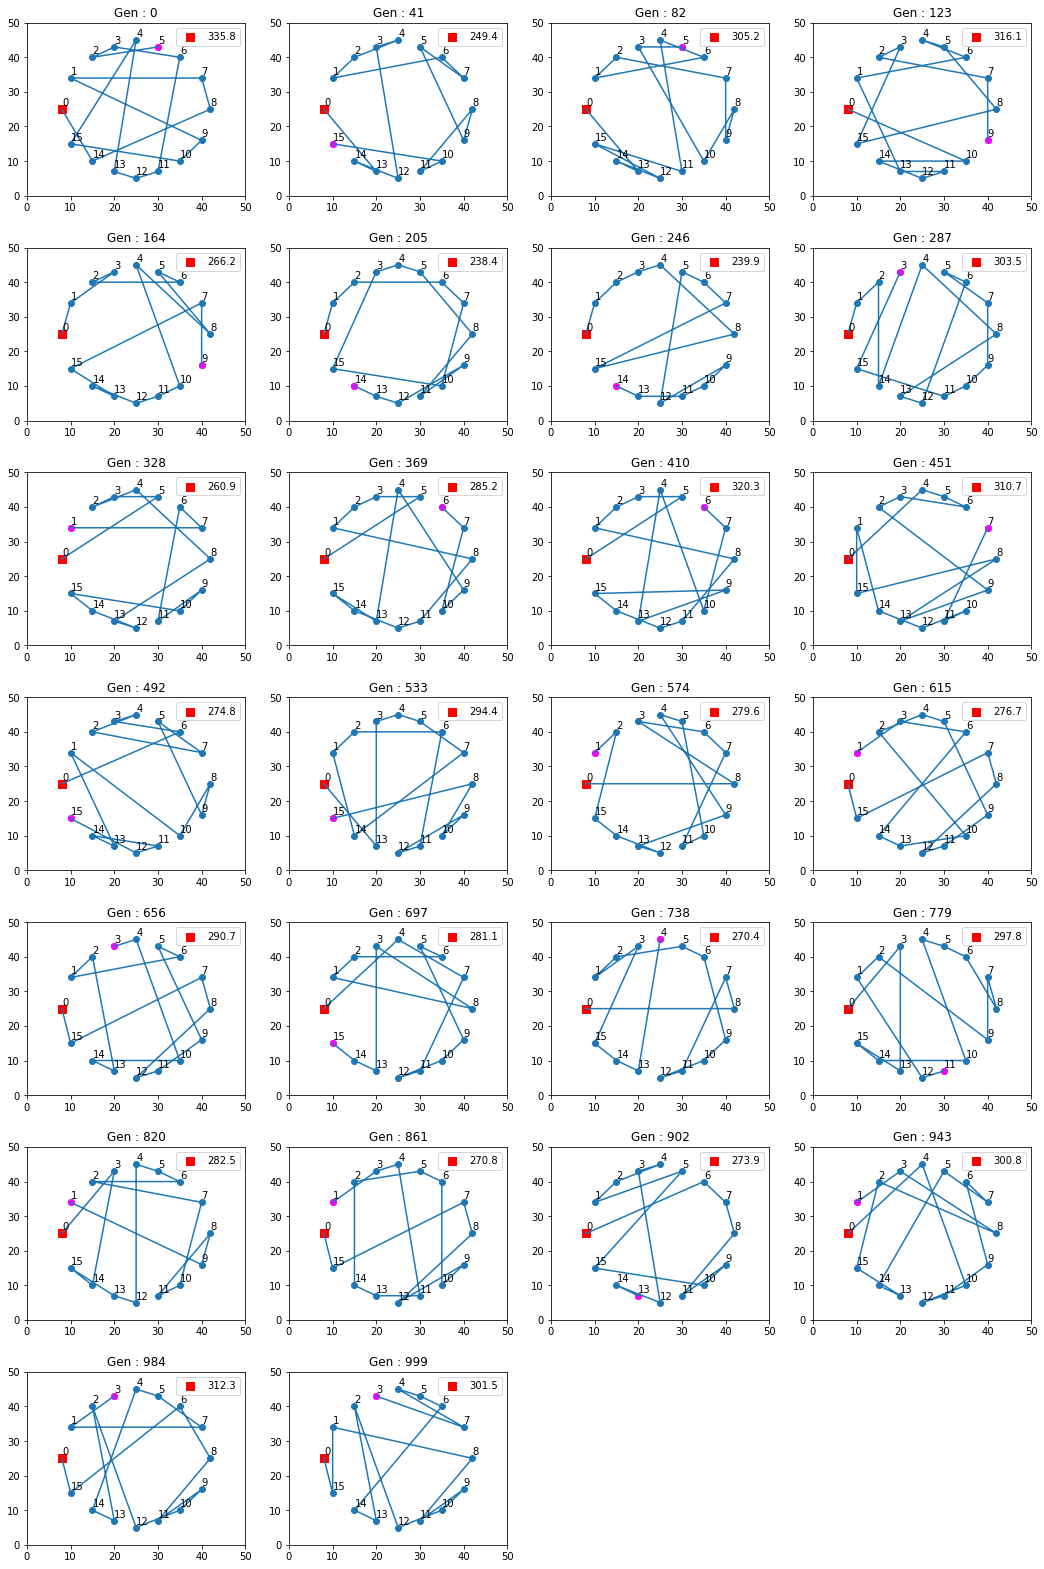

In [40]:
repeat = 1000        # 세대 반복 회수

### 경로 표시 그래프 초기화
step = repeat//24   # 그래프 표시 단계수
if step < 1:
    step = 1
s = 0               # 그래프 표시 단계 인덱스
fig = plt.figure(figsize=(18, 28))

for k in range(repeat):     # 반복회수만큼 세대 반복
    # 2번 룰렛휠
    
    #worst = max(score) # (위에거 가중치 쓸때 필요)
    #best = min(score)  # (위에거 가중치 쓸때 필요)
    
    f = []
    for i in score:
        #fi = (worst - i) + ((worst - best) / 3)    # 나쁜 해들의 선택이 거의 안되는걸 막기위해 사용한 적합도
        fi = 1 / i    # 역수를 가중치로
        f.append(fi)

    sum_f = sum(f)
    # if int(sum_f) == 0: # score의 값이 모두 같은 경우(위에거 가중치 쓸때 필요)
    #     f1 = [1/len(f) for i in range(len(f))]
    # else:
    #     f1 = [f[i] / sum_f for i in range(len(f))]
    
    f1 = [f[i] / sum_f for i in range(len(f))]
        
    par_candi = [_ for _ in range(len(score))]
    
    pop = new_gen_for_roulette_wheel(pop, par_candi, nCity, f1)            # 무작위 교배 후 다음 세대 생성

    score = []
    score = score_calc(dist, pop, nCity)
    first = np.argsort(score)[0]            # 적합도 1위 개체 선택, 출력
    print(score[first], end=' ')
    if (k%25 == 0):
        print()

###### 각 step 세대마다 적합도 1위 개체의 순회 경로 그리기  ######    
    if k != s*step and k != repeat-1 :
        continue
    plt.subplot(7,4,s+1)
    plt.subplots_adjust(hspace=0.3)
    plt.scatter(x[0], y[0], marker='s', c='red', s=55)
    plt.scatter(x[1:], y[1:])
    plt.scatter(x[pop[first][-1]], y[pop[first][-1]], c='magenta')
    for i in range(nCity):
        plt.text(pos[i][0], pos[i][1]+1, i)

    plotX = []
    plotX.append(pos[0][0])
    plotY = []
    plotY.append(pos[0][1])
    for i in range(nCity-1):
        plotX.append(pos[pop[first][i]][0])
        plotY.append(pos[pop[first][i]][1])

    plt.plot(plotX, plotY)

    plt.legend([str(score[first])])
    plt.xlim(0,50)
    plt.ylim(0,50)
    plt.title("Gen : {}".format(k))
    s = s+1